In [1]:
import numpy as np
from itertools import product,combinations
import matplotlib.pyplot as plt
from math import log
import scipy.stats

In [2]:
def design_matrix(n):
    D=[]
    for i in product([-1,+1],repeat=n):
        D.append(list(i))
    return D

In [3]:
def effect_matrix(dm):
    (r,c)=np.shape(dm)
    x=''
    for i in range(c):
        x+=str(i)
    labels=[]
    for i in range(c-1):
        for j in combinations(x,i+2):
            labels.append(list(map(int,j)))
    for i in range(len(labels)):
        I=np.full(r,1)
        for j in labels[i]:
            I=I*dm[:,j]
        dm=np.insert(dm,np.shape(dm)[1],I,1)
    return (dm,labels)

In [4]:
def effects(e,R):
    avg=np.mean(R,axis=0)
    e=e.astype('float64')
    for i in range(len(e)):
        for j in range(len(e[i])):
            e[i][j]=e[i][j]*avg[i]
    return e

In [5]:
def eff_det(E,labels,R):
    AVG=np.mean(R)
    e=[("AVG",AVG)]
    labels2=[]
    for i in labels[-1]:
        labels2.append([i])
    labels2.extend(labels)
    (r,c)=np.shape(E)
    for i in range(c):
        e.append((l2str(labels2[i]),np.sum(E[:,i])/(len(E)/2)))
    if len(R)==2:
        N=2*len(R[0])
        s2=np.sum((R[0]-R[1])**2)/(2*len(R[0]))
        V_eff=(4/N)*s2
        sd_eff=np.sqrt(V_eff)
        V_ave=(s2/N)
        sd_ave=np.sqrt(V_ave)
        return (e,sd_eff,sd_ave)
    else:
        return(e)

In [6]:
def significants(eff_ints,sd_ave,sd_eff,DOF,a):
    t_crit=scipy.stats.t.ppf(q=1-a,df=DOF)
    sig=[]
    if eff_ints[0][1]/sd_ave>=t_crit:
        sig.append(eff_ints[0])
    for i in range(1,len(eff_ints)):
        if eff_ints[i][1]/sd_eff>=t_crit:
            sig.append(eff_ints[i])
    return sig

In [7]:
def seq_eval(sig,seq=''): #,extremes):
    if seq:
        val=sig[0][1]
        for i in range(len(seq)):
            if seq[i]=="+":
                val+=(sig[i+1][1]/2)*1 #extremes[i][1]
            elif seq[i]=="-":
                val+=(sig[i+1][1]/2)*(-1) #extremes[i][0]
    return val 

In [8]:
def model_eval(sig,seq_list): #,extremes):
    L=[]
    for seq in seq_list:
        L.append((seq,seq_eval(sig,seq)))
    return L  

In [9]:
#all main effects considered
def model(dm,eff_ints,order=1): #,extremes):
    n=log(len(dm),2)
    est=[]
    for i in range(len(dm)):
        val=eff_ints[0][1]
        for j in range(len(dm[i])):
            val+=((eff_ints[j+1][1])/2)*dm[i][j] #extremes[j][1/0]
        est.append(val)
    return (est)

In [10]:
def resi(A,R):
    avg=np.mean(R,axis=0)
    res=[]
    for i in range(len(avg)):
        res.append(avg[i]-A[i])
    return res

In [11]:
def prob_plot(A,label,title=''):
    m=len(A)
    Pi=[(100/m)*(i-0.5) for i in range(1,m+1)]
    A.sort()
    plt.scatter(A,Pi)
    plt.axvline(x=0, c="black")
    plt.axhline(y=0, c="black")
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.title(label+" Vs "+ "Probability"+title)

In [12]:
def l2str(A):
    x=''
    for i in A:
        x+=str(i)
    return x

In [13]:
def dm2strL(dm):
    L=[]
    for i in range(len(dm)):
        x=''
        for j in range(len(dm[i])):
            if dm[i][j]==1:
                x+='+'
            elif dm[i][j]==-1:
                x+='-'
        L.append(x)
    return (L)

In [14]:
R=np.array([[191,164,402,123,
             211,117,199,136]])
extremes=[(0.8,1.2),(450,550),(125,200),(275,300)]
n=3
A=design_matrix(n)
A=np.array(A)
A=np.flip(A,1)
#Generators definition (edit manually)
A=np.insert(A,np.shape(A)[1],(-1)*(A[:,(1)-1]*A[:,(2)-1]),1)
A=np.insert(A,np.shape(A)[1],(+1)*(A[:,(2)-1]*A[:,(3)-1]),1)

E=effect_matrix(A)
E1=effects(E[0],R)
eff_ints=eff_det(E1,E[1],R)
eff_ints

[('AVG', 192.875),
 ('0', -115.75),
 ('1', 44.25),
 ('2', -54.25),
 ('3', 55.25),
 ('4', -40.75),
 ('01', -55.25),
 ('02', 37.25),
 ('03', -44.25),
 ('04', 70.75),
 ('12', -40.75),
 ('13', 115.75),
 ('14', -54.25),
 ('23', -70.75),
 ('24', 44.25),
 ('34', -37.25),
 ('012', 70.75),
 ('013', -385.75),
 ('014', 37.25),
 ('023', 40.75),
 ('024', -55.25),
 ('034', 54.25),
 ('123', -37.25),
 ('124', 385.75),
 ('134', -70.75),
 ('234', 115.75),
 ('0123', 54.25),
 ('0124', -115.75),
 ('0134', 40.75),
 ('0234', -385.75),
 ('1234', 55.25),
 ('01234', -44.25)]

In [15]:
K=[]
for i in eff_ints:
    K.append(i)
K.sort(key = lambda x: abs(x[1]))
K

[('02', 37.25),
 ('34', -37.25),
 ('014', 37.25),
 ('123', -37.25),
 ('4', -40.75),
 ('12', -40.75),
 ('023', 40.75),
 ('0134', 40.75),
 ('1', 44.25),
 ('03', -44.25),
 ('24', 44.25),
 ('01234', -44.25),
 ('2', -54.25),
 ('14', -54.25),
 ('034', 54.25),
 ('0123', 54.25),
 ('3', 55.25),
 ('01', -55.25),
 ('024', -55.25),
 ('1234', 55.25),
 ('04', 70.75),
 ('23', -70.75),
 ('012', 70.75),
 ('134', -70.75),
 ('0', -115.75),
 ('13', 115.75),
 ('234', 115.75),
 ('0124', -115.75),
 ('AVG', 192.875),
 ('013', -385.75),
 ('124', 385.75),
 ('0234', -385.75)]

In [16]:
index=[0,4,8,12,16,20,24]

In [17]:
sum=0
for i in index:
    sum+=(K[i][1])**2
s2effect=sum/len(index)
s_effect=np.sqrt(s2effect)
s2exp=((len(R[0]))/4)*s2effect
s_exp=np.sqrt(s2exp)
print("s_effect: ",s_effect)
print("s_exp: ",s_exp)

s_effect:  64.81339973889878
s_exp:  91.65998893425949


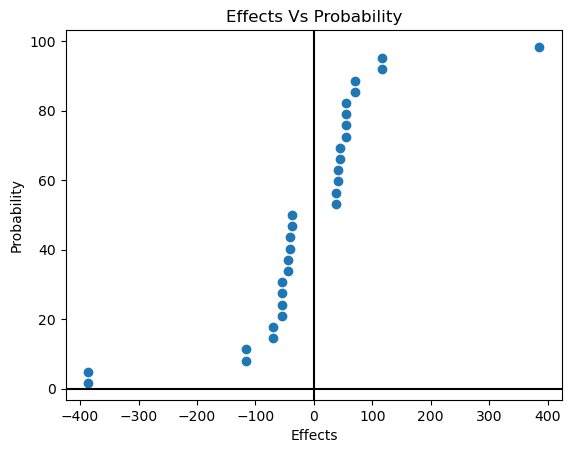

In [18]:
prob_plot([eff_ints[i][1] for i in range(1,len(eff_ints))],label="Effects")

In [19]:
def remstr(x,y):
    for i in y:
        if i in x:
            x=x.replace(i,'')
        elif i not in x:
            x=x+i
    L=list(x)
    L.sort()
    return ''.join(L)

In [20]:
def confounding(def_rel,res):
    L=def_rel.split("=")
    lhs=''
    rhs=L[1:]
    mul=[]
    for i in range(1,len(res)+1):
        for j in combinations(res,i):
            mul.append(''.join(j))
    C=[]
    C.append(def_rel)
    for k in range(len(mul)):
        x=mul[k]+"="
        for j in rhs:
            x+=(remstr(j,mul[k]))
            x+="="
        C.append(x.rstrip("="))
    return C  

In [21]:
#QUIZ-5

In [22]:
confounding('I=ABD=ABCE=DCE','ABC')

['I=ABD=ABCE=DCE',
 'A=BD=BCE=ACDE',
 'B=AD=ACE=BCDE',
 'C=ABCD=ABE=DE',
 'AB=D=CE=ABCDE',
 'AC=BCD=BE=ADE',
 'BC=ACD=AE=BDE',
 'ABC=CD=E=ABDE']

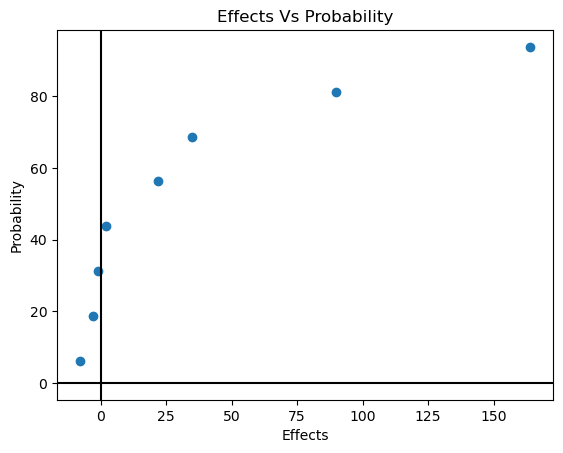

In [23]:
A=[164,-8,-1,35,22,-3,2,90]
prob_plot(A,label="Effects")

In [24]:
B=[2,-3,-1,-8] #insignificant effects

In [25]:
sum=0
for i in range(len(B)):
    sum+=(B[i])**2
s2effect=sum/len(B)
s_effect=np.sqrt(s2effect)
s2exp=((8)/4)*s2effect
s_exp=np.sqrt(s2exp)
print("s_effect: ",s_effect)
print("s_exp: ",s_exp)

s_effect:  4.415880433163924
s_exp:  6.244997998398398
